### Import packages

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load data

In [42]:
# Load the CSV data
baseline = []
baseline.append(pd.read_csv('../results/baseline_1080.csv'))
baseline.append(pd.read_csv('../results/baseline_720.csv'))
baseline.append(pd.read_csv('../results/baseline_480.csv'))
baseline.append(pd.read_csv('../results/baseline_240.csv'))

# Clean column names
for i in range(len(baseline)):
    baseline[i].columns = baseline[i].columns.str.strip()

video = []
video.append(pd.read_csv('../results/video_1080.csv'))
video.append(pd.read_csv('../results/video_720.csv'))
video.append(pd.read_csv('../results/video_480.csv'))
video.append(pd.read_csv('../results/video_240.csv'))

for i in range(len(video)):
    video[i].columns = video[i].columns.str.strip()

video_calibration = []
video_calibration.append(pd.read_csv('../results/calibration_1080.csv'))
video_calibration.append(pd.read_csv('../results/calibration_720.csv'))
video_calibration.append(pd.read_csv('../results/calibration_480.csv'))
video_calibration.append(pd.read_csv('../results/calibration_240.csv'))

for i in range(len(video_calibration)):
    video_calibration[i].columns = video_calibration[i].columns.str.strip()

metrics = pd.read_csv('../results/metrics.csv')
metrics.columns = metrics.columns.str.strip()

### Distances plot

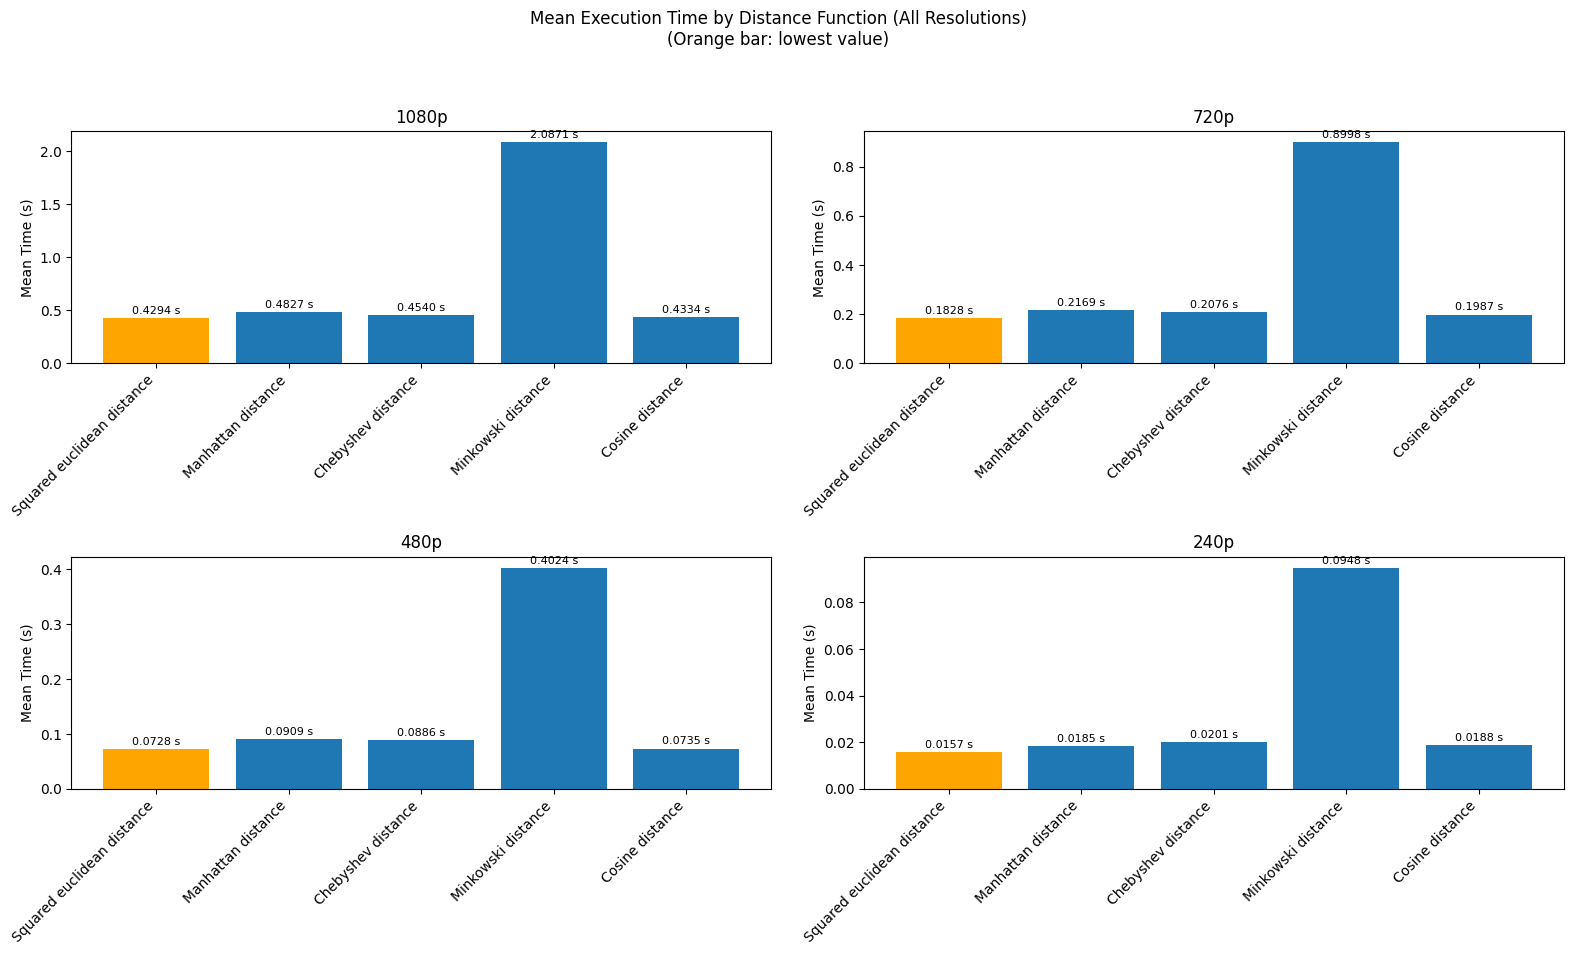

In [43]:
resolutions = ['1080p', '720p', '480p', '240p']
n = len(baseline)

# --- Save each plot individually ---
for i in range(n):
    means = baseline[i].mean()
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(means)), means.values)
    plt.title(f'Mean Execution Time by Distance Function')
    plt.ylabel('Mean Time (seconds)')
    plt.xticks(range(len(means)), [col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        plt.text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom')
    plt.tight_layout()
    plt.savefig(f'mean_times_{resolutions[i]}.png', dpi=100, bbox_inches='tight')
    plt.close()

# --- Show all in a single subplot figure ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i in range(n):
    means = baseline[i].mean()
    min_idx = np.argmin(means.values)
    colors = ['C0'] * len(means)
    colors[min_idx] = 'orange'  # Highlight the minimum bar

    bars = axes[i].bar(range(len(means)), means.values, color=colors)
    axes[i].set_title(f'{resolutions[i]}')
    axes[i].set_ylabel('Mean Time (s)')
    axes[i].set_xticks(range(len(means)))
    axes[i].set_xticklabels([col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        axes[i].text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom', fontsize=8)
plt.suptitle('Mean Execution Time by Distance Function (All Resolutions)\n(Orange bar: lowest value)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### GPU Implementations plot

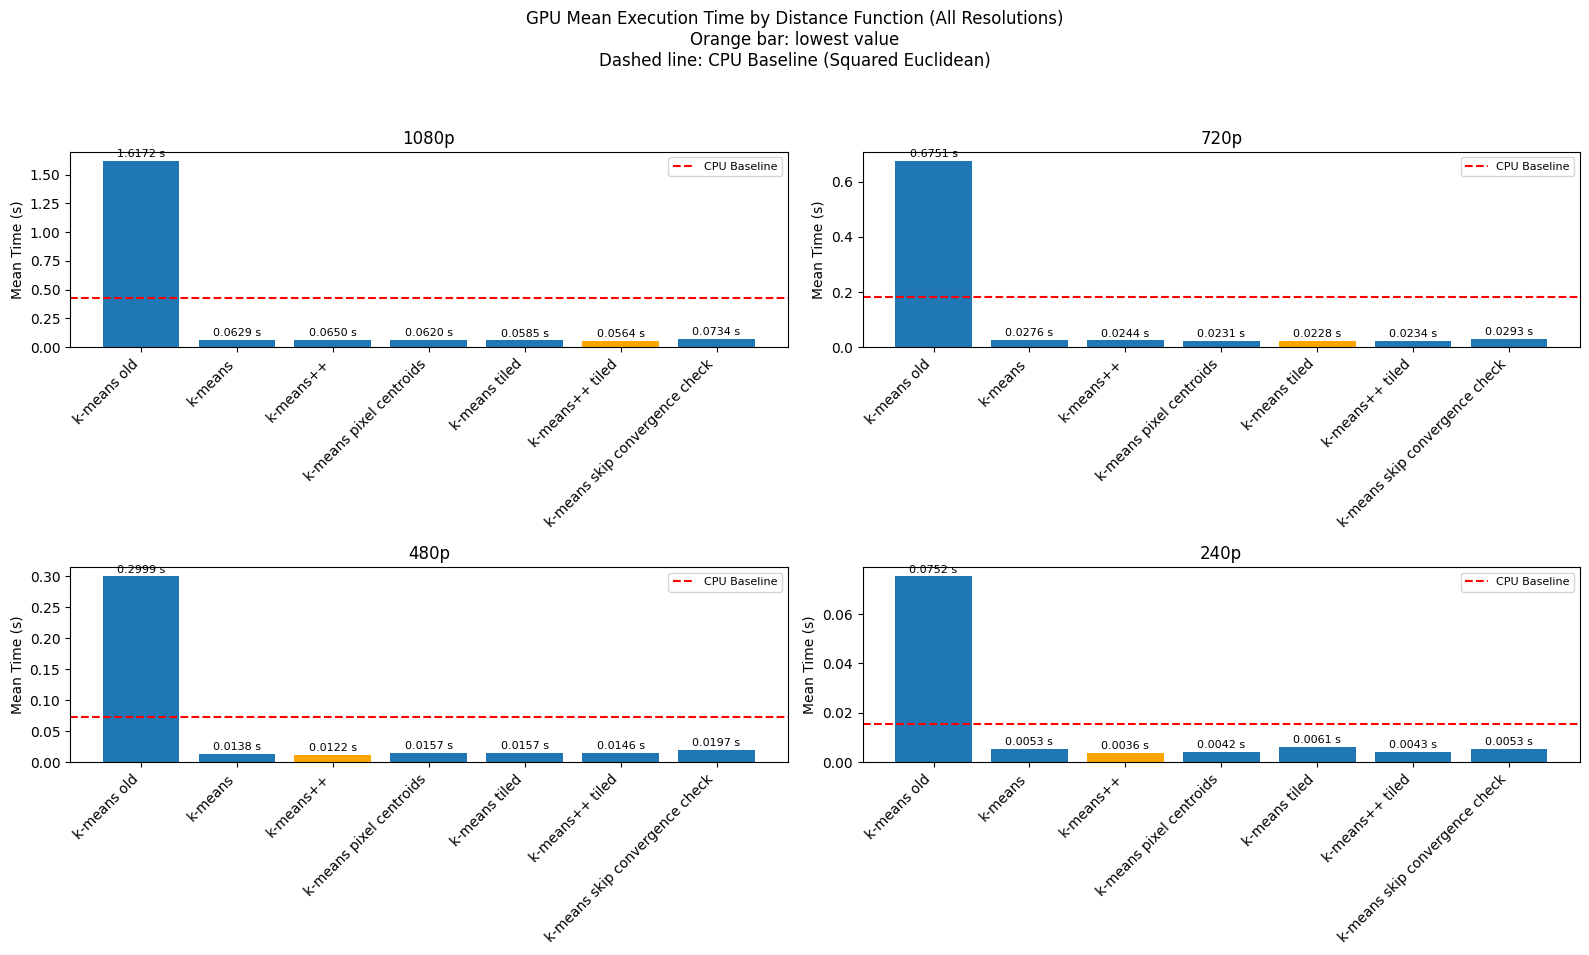

In [44]:
resolutions = ['1080p', '720p', '480p', '240p']
n = len(video)

# --- Save each GPU plot individually with CPU baseline line ---
for i in range(n):
    means = video[i].mean()
    cpu_baseline = baseline[i].mean().iloc[0]  # First column (squared euclidean)
    plt.figure(figsize=(10, 6))
    bars = plt.bar(range(len(means)), means.values)
    plt.title(f'GPU Mean Execution Time by Distance Function')
    plt.ylabel('Mean Time (seconds)')
    plt.xticks(range(len(means)), [col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        plt.text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom')
    # Add dashed line for CPU baseline
    plt.axhline(cpu_baseline, color='red', linestyle='--', label='CPU Baseline (Squared Euclidean)')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'gpu_mean_times_{resolutions[i]}.png', dpi=100, bbox_inches='tight')
    plt.close()

# --- Show all GPU plots in a single subplot figure with CPU baseline line ---
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()
for i in range(n):
    means = video[i].mean()
    cpu_baseline = baseline[i].mean().iloc[0]
    min_idx = np.argmin(means.values)
    colors = ['C0'] * len(means)
    colors[min_idx] = 'orange'  # Highlight the minimum bar

    bars = axes[i].bar(range(len(means)), means.values, color=colors)
    axes[i].set_title(f'{resolutions[i]}')
    axes[i].set_ylabel('Mean Time (s)')
    axes[i].set_xticks(range(len(means)))
    axes[i].set_xticklabels([col.replace('_', '\n') for col in means.index], rotation=45, ha='right')
    for j, value in enumerate(means.values):
        axes[i].text(j, value + max(means.values)*0.01, f'{value:.4f} s', ha='center', va='bottom', fontsize=8)
    # Add dashed line for CPU baseline
    axes[i].axhline(cpu_baseline, color='red', linestyle='--', label='CPU Baseline')
    axes[i].legend(fontsize=8)
plt.suptitle('GPU Mean Execution Time by Distance Function (All Resolutions)\nOrange bar: lowest value\nDashed line: CPU Baseline (Squared Euclidean)')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### GPU with Video calibration comparison plot

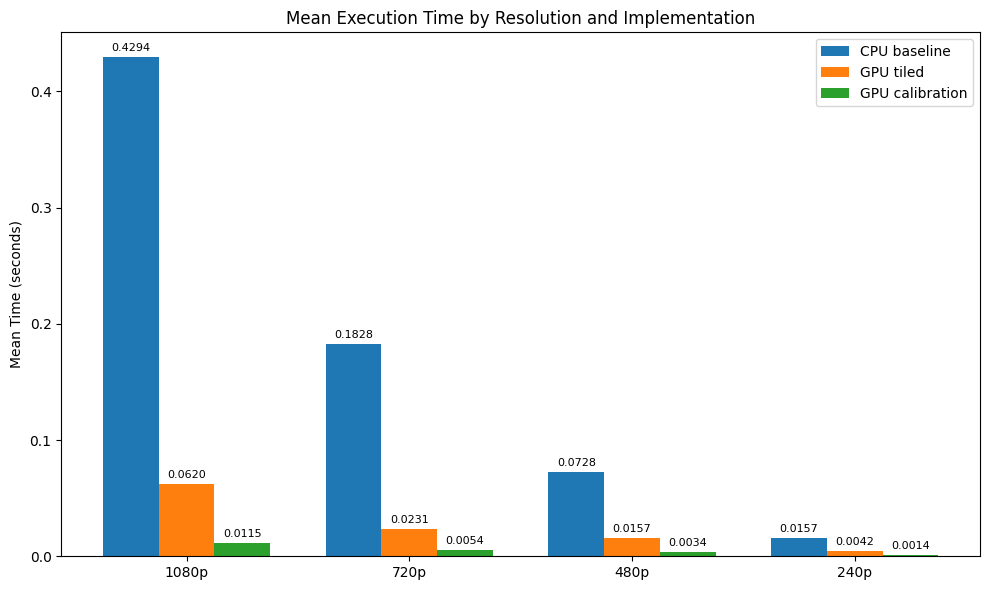

In [45]:
import numpy as np
import matplotlib.pyplot as plt

resolutions = ['1080p', '720p', '480p', '240p']
n = len(resolutions)

# Prepare data for each resolution
cpu = [baseline[i].mean().iloc[0] for i in range(n)]  # CPU baseline (first column)
gpu = [video[i].mean().iloc[3] for i in range(n)]     # GPU tiled (fourth column)
gpu_cal = [video_calibration[i].mean().iloc[0] for i in range(n)]  # GPU calibration (first column)

x = np.arange(n)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, cpu, width, label='CPU baseline')
rects2 = ax.bar(x, gpu, width, label='GPU tiled')
rects3 = ax.bar(x + width, gpu_cal, width, label='GPU calibration')

ax.set_ylabel('Mean Time (seconds)')
ax.set_title('Mean Execution Time by Resolution and Implementation')
ax.set_xticks(x)
ax.set_xticklabels(resolutions)
ax.legend()

# Add value labels
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig(f'time_comparison.png', dpi=100, bbox_inches='tight')
plt.show()